In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [4]:
cancer = pd.read_csv("cancer.csv")

In [5]:
cancer.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [6]:
cancer.shape
print(f"The Number Of Rows : {cancer.shape[0]}")
print(f"The Number Of Columns is : {cancer.shape[1]}")


The Number Of Rows : 1000
The Number Of Columns is : 25


In [7]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [8]:
cancer.isnull().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [9]:
duplicated_values = cancer[cancer.duplicated()]
duplicated_values

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level


In [10]:
cancer.nunique()

Patient Id                  1000
Age                           40
Gender                         2
Air Pollution                  8
Alcohol use                    8
Dust Allergy                   8
OccuPational Hazards           8
Genetic Risk                   7
chronic Lung Disease           7
Balanced Diet                  7
Obesity                        7
Smoking                        8
Passive Smoker                 8
Chest Pain                     9
Coughing of Blood              9
Fatigue                        8
Weight Loss                    8
Shortness of Breath            8
Wheezing                       8
Swallowing Difficulty          8
Clubbing of Finger Nails       9
Frequent Cold                  7
Dry Cough                      7
Snoring                        7
Level                          3
dtype: int64

In [11]:
encoder = LabelEncoder()
encoded_level = encoder.fit_transform(cancer['Level'])

In [12]:
encoded_level

array([1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [13]:
encoded_level_df = pd.DataFrame(encoded_level)

In [14]:
cancer = cancer.drop('Level', axis=1)
cancer = pd.concat([cancer,encoded_level_df], axis=1)

In [15]:
# The Column Level is now renamed 0

cancer.columns

Index([              'Patient Id',                      'Age',
                         'Gender',            'Air Pollution',
                    'Alcohol use',             'Dust Allergy',
           'OccuPational Hazards',             'Genetic Risk',
           'chronic Lung Disease',            'Balanced Diet',
                        'Obesity',                  'Smoking',
                 'Passive Smoker',               'Chest Pain',
              'Coughing of Blood',                  'Fatigue',
                    'Weight Loss',      'Shortness of Breath',
                       'Wheezing',    'Swallowing Difficulty',
       'Clubbing of Finger Nails',            'Frequent Cold',
                      'Dry Cough',                  'Snoring',
                                0],
      dtype='object')

In [16]:
name_mapping = {'encoded_level': 'Level'}

In [18]:
cancer = cancer.rename(columns=name_mapping)

In [19]:
# Rename the column Level wit it's original name

cancer.columns=[         'Patient Id',  'Age',                           'Gender',
                  'Air Pollution',              'Alcohol use',
                   'Dust Allergy',     'OccuPational Hazards',
                   'Genetic Risk',     'chronic Lung Disease',
                  'Balanced Diet',                  'Obesity',
                        'Smoking',           'Passive Smoker',
                     'Chest Pain',        'Coughing of Blood',
                        'Fatigue',              'Weight Loss',
            'Shortness of Breath',                 'Wheezing',
          'Swallowing Difficulty', 'Clubbing of Finger Nails',
                  'Frequent Cold',                'Dry Cough',
                        'Snoring',            'Missing_cloumn']

In [20]:
desired_columns = ['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring', 'Level']

missing_columns = set(desired_columns) - set(cancer.columns)
extra_columns = set(cancer.columns) - set(desired_columns)

print("Missing columns:", missing_columns)
print("Extra columns:", extra_columns)

Missing columns: {'Level'}
Extra columns: {'Missing_cloumn', 'Patient Id'}


In [21]:
# Sample DataFrame with 'Level' column containing categorical values
data = {'Level': ['Low', 'Medium', 'High', 'High', 'Medium', 'Low']}
df = pd.DataFrame(data)

# Define a dictionary to map categorical values to numeric values
mapping = {'Low': 1, 'Medium': 2, 'High': 3}

# Apply mapping to the 'Level' column in DataFrame df
df['Level'] = df['Level'].map(mapping)

# Print the updated DataFrame
print(df)

   Level
0      1
1      2
2      3
3      3
4      2
5      1


In [22]:
cancer.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Missing_cloumn
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,0
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,0
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,0


<Axes: xlabel='Age', ylabel='Density'>

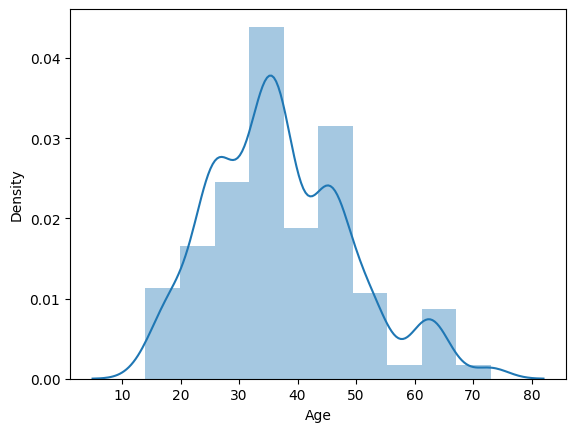

In [23]:
sns.distplot(cancer['Age'], bins=10)

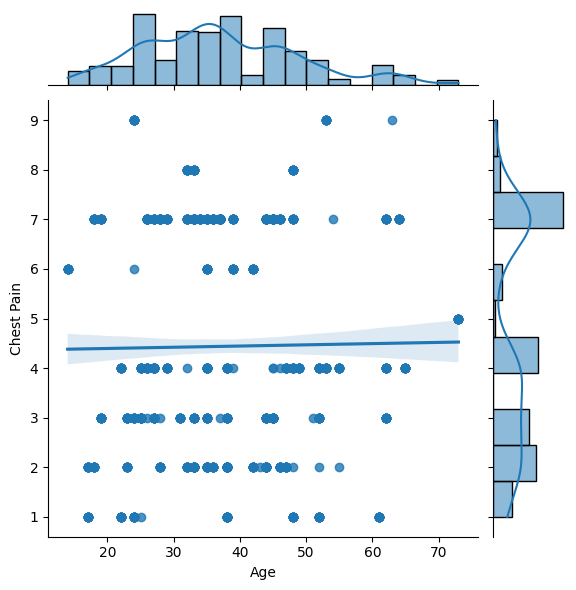

In [24]:
sns.jointplot(x='Age', y='Chest Pain', data=cancer, kind='reg')

<Axes: >

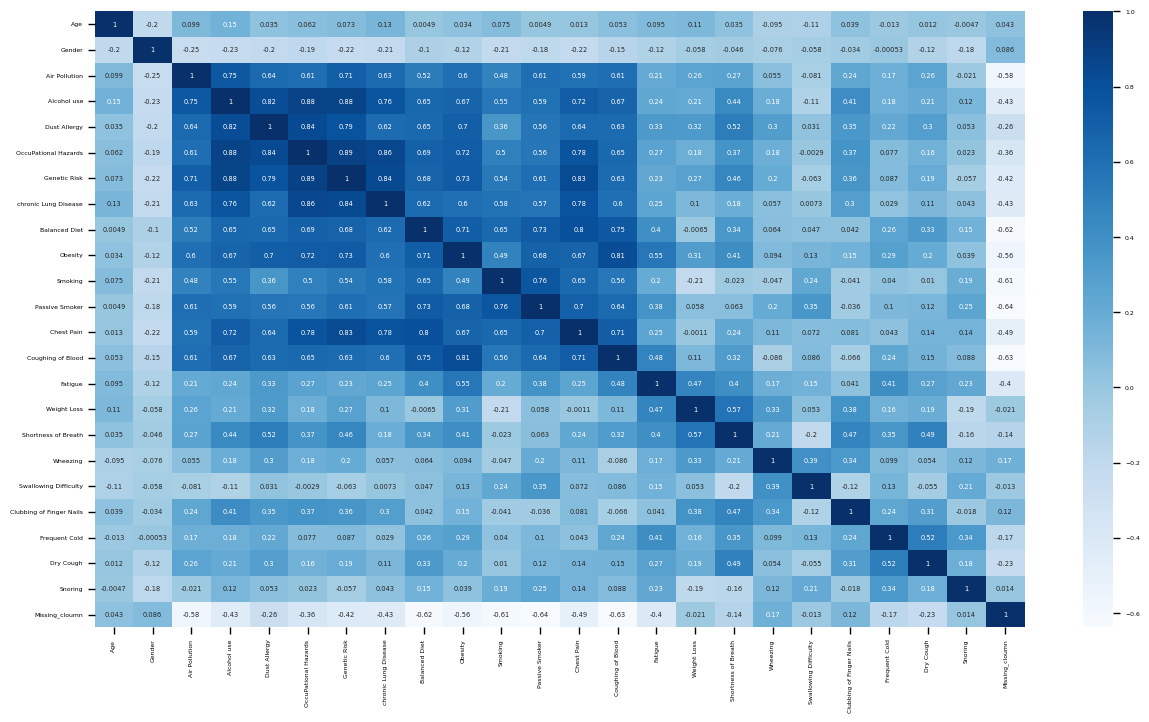

In [25]:
plt.figure(figsize=(15,8))
sns.set_context('paper', font_scale=0.5)

cancer_mx = cancer.corr()
sns.heatmap(cancer_mx, annot=True, cmap='Blues')

<Figure size 1500x800 with 0 Axes>

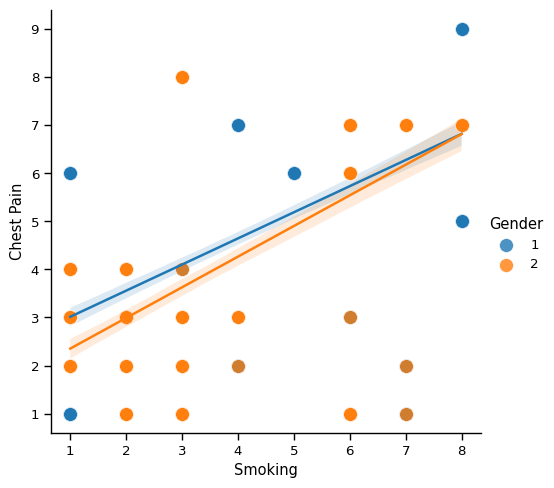

In [26]:
plt.figure(figsize=(15,8))
sns.set_context('paper', font_scale=1.1)
sns.lmplot(x='Smoking', y='Chest Pain', hue='Gender',data=cancer,
          scatter_kws={'s':100, 'linewidth': 0.5, 'edgecolor':'w'})

<Figure size 1000x600 with 0 Axes>

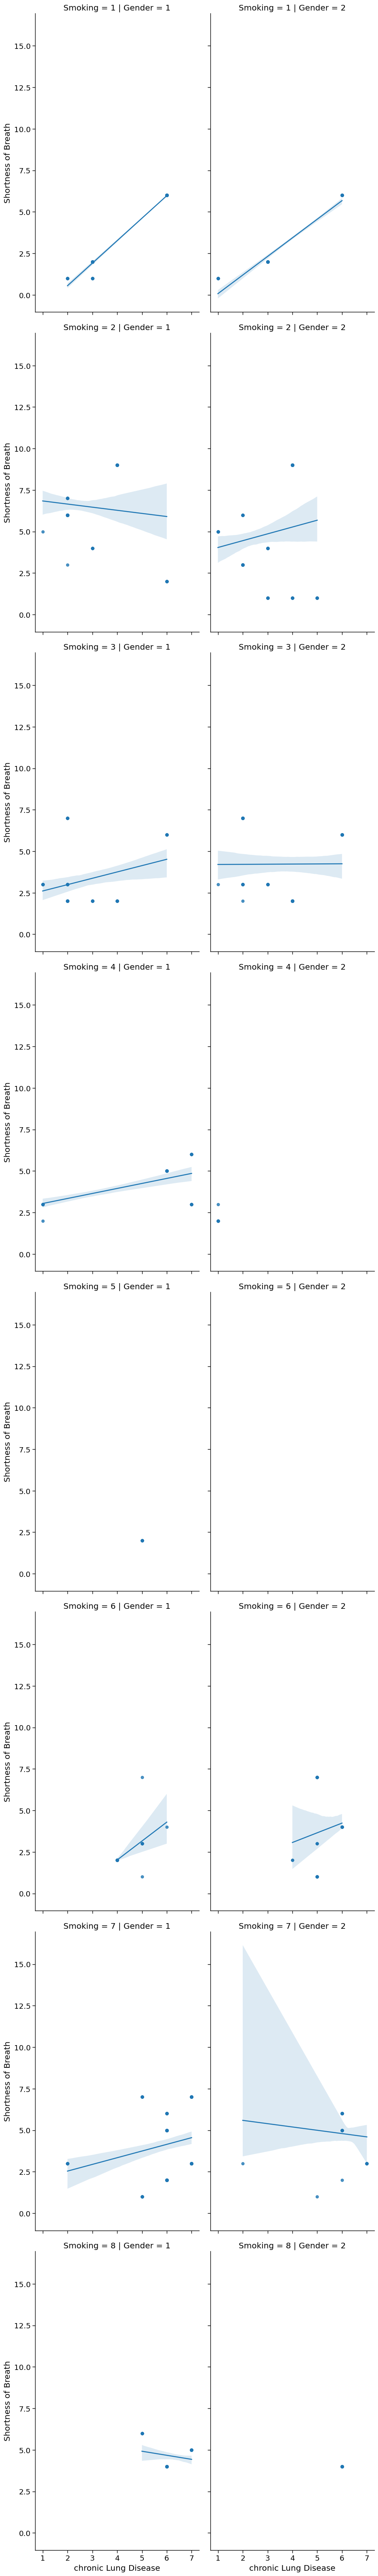

In [27]:
plt.figure(figsize=(10,6))
sns.set_context('paper', font_scale=1.5)
sns.lmplot(x='chronic Lung Disease', y='Shortness of Breath', col='Gender', row='Smoking', data=cancer, height=8, aspect=0.6)

In [28]:
x = cancer.iloc[:, :-1]
y = cancer.iloc[:, -1]

In [29]:
#Splitting data for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [30]:
# Print the first few rows of the training data

# Print the first few rows of the test data
print("\nTest Data:")
x_test.head()



Test Data:


,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
993,P993,37,2,7,7,7,7,6,7,7,...,8,4,2,3,1,4,5,6,7,5
859,P872,48,2,6,8,7,7,7,6,2,...,3,2,7,6,5,1,9,3,4,2
298,P367,23,1,3,2,4,2,3,2,3,...,3,4,5,6,5,5,4,6,5,4
553,P597,25,2,4,5,6,5,5,4,6,...,8,8,7,9,2,1,4,6,7,2
672,P703,33,1,2,4,5,4,3,2,2,...,4,3,4,2,2,3,1,2,3,4


In [31]:
x_train.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
253,P326,42,1,2,4,5,6,5,5,4,...,3,8,7,7,3,8,9,1,6,2
667,P7,39,1,4,5,6,6,5,4,6,...,6,5,3,2,4,3,1,7,5,6
85,P175,38,2,1,2,3,4,2,4,3,...,4,4,1,2,4,6,5,4,2,5
969,P971,52,1,6,8,7,7,7,6,2,...,3,2,7,6,5,1,9,3,4,2
75,P166,35,1,2,1,5,3,2,3,2,...,4,6,7,2,5,8,1,3,2,3


In [32]:
x_test.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
993,P993,37,2,7,7,7,7,6,7,7,...,8,4,2,3,1,4,5,6,7,5
859,P872,48,2,6,8,7,7,7,6,2,...,3,2,7,6,5,1,9,3,4,2
298,P367,23,1,3,2,4,2,3,2,3,...,3,4,5,6,5,5,4,6,5,4
553,P597,25,2,4,5,6,5,5,4,6,...,8,8,7,9,2,1,4,6,7,2
672,P703,33,1,2,4,5,4,3,2,2,...,4,3,4,2,2,3,1,2,3,4


In [ ]:
#x_train_encoded = pd.get_dummies(x_train) #Here the data is getting weird, PatientId's from previous table which were used to identify the Patients are now in the columns table.
#x_train_encoded.head() #https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [33]:
# Exclude 'PatientId' column from one-hot encoding
columns_to_encode = [col for col in x_train.columns if col != 'PatientId']
x_train_encoded = pd.get_dummies(x_train[columns_to_encode])

In [34]:
print(columns_to_encode)

['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring']


In [35]:
x_test_encoded = pd.get_dummies(x_test)
x_test_encoded.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Patient Id_P983,Patient Id_P987,Patient Id_P988,Patient Id_P99,Patient Id_P990,Patient Id_P991,Patient Id_P992,Patient Id_P993,Patient Id_P996,Patient Id_P999
993,37,2,7,7,7,7,6,7,7,7,...,0,0,0,0,0,0,0,1,0,0
859,48,2,6,8,7,7,7,6,2,4,...,0,0,0,0,0,0,0,0,0,0
298,23,1,3,2,4,2,3,2,3,3,...,0,0,0,0,0,0,0,0,0,0
553,25,2,4,5,6,5,5,4,6,7,...,0,0,0,0,0,0,0,0,0,0
672,33,1,2,4,5,4,3,2,2,4,...,0,0,0,0,0,0,0,0,0,0


In [36]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

ValueError: could not convert string to float: 'P326'

In [37]:
# Make predictions using the logistic regression model
pred = model_lr.predict(x_test_encoded)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Patient Id_P10
- Patient Id_P100
- Patient Id_P102
- Patient Id_P105
- Patient Id_P110
- ...
Feature names seen at fit time, yet now missing:
- Patient Id


In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scale=MinMaxScaler()
x_train_scaled=pd.DataFrame(scale.fit_transform(x_train),columns=x_train.columns)
x_train_scaled

ValueError: could not convert string to float: 'P326'